### importing and understanding data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
from sklearn.model_selection import GridSearchCV

In [7]:
pd.set_option('display.max_rows',None, 'display.max_columns',None)

In [8]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
data.shape

(1460, 81)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
pd.set_option('display.max_rows', None)

#### checking for null values

In [12]:
round((data.isnull().sum()/len(data))*100, 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

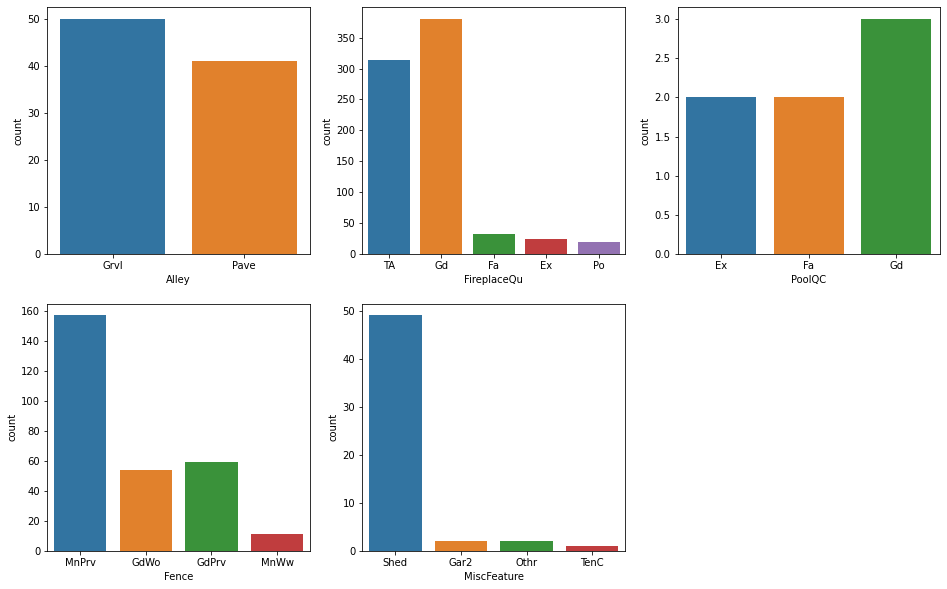

In [13]:
plt.figure(figsize=[16,10])
plt.subplot(2,3,1)
sns.countplot(data['Alley'])
plt.subplot(2,3,2)
sns.countplot(data['FireplaceQu'])
plt.subplot(2,3,3)
sns.countplot(data['PoolQC'])
plt.subplot(2,3,4)
sns.countplot(data['Fence'])
plt.subplot(2,3,5)
sns.countplot(data['MiscFeature'])
# plt.subplot(2,3,6)
plt.show()

In [14]:
data['Alley'] =data['Alley'].fillna('No Alley access')
data['FireplaceQu'] =data['FireplaceQu'].fillna('No Fireplace')
data['PoolQC'] =data['PoolQC'].fillna('No Pool')
data['Fence'] =data['Fence'].fillna('No Fence')
data['MiscFeature'] =data['MiscFeature'].fillna('None')

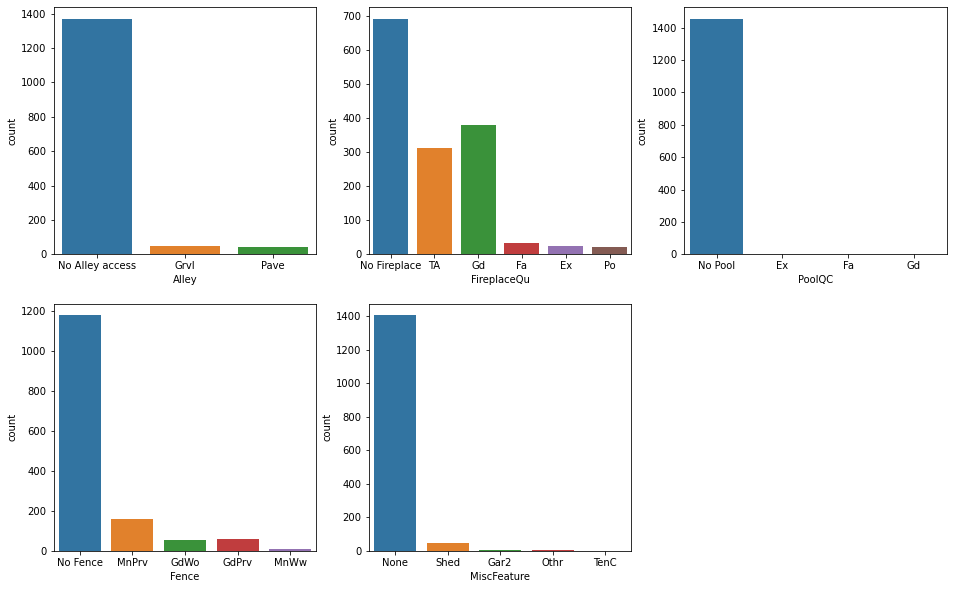

In [15]:
plt.figure(figsize=[16,10])
plt.subplot(2,3,1)
sns.countplot(data['Alley'])
plt.subplot(2,3,2)
sns.countplot(data['FireplaceQu'])
plt.subplot(2,3,3)
sns.countplot(data['PoolQC'])
plt.subplot(2,3,4)
sns.countplot(data['Fence'])
plt.subplot(2,3,5)
sns.countplot(data['MiscFeature'])
# plt.subplot(2,3,6)
plt.show()

#### dropping all the columns which are highly marginalised

In [16]:
data=  data.drop(['Alley','PoolQC', 'MiscFeature'],axis=1)

In [17]:
# data.columns[(data.isnull().sum()/len(data))*100>47.00]

In [18]:
# data = data[data.columns[~((data.isnull().sum()/len(data))*100>47.00)]]
# data.shape

In [19]:
data.isnull().sum()[data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [20]:
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [21]:
data['Electrical']= data['Electrical'].fillna(data['Electrical'].mode()[0])

In [22]:
data.isnull().sum()[data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [23]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

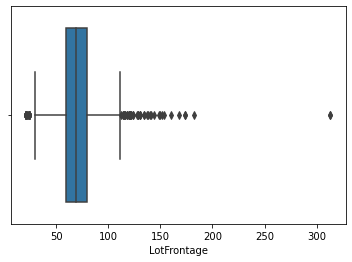

In [24]:
sns.boxplot(data.LotFrontage)
plt.show()

In [25]:
data['LotFrontage'].mode()

0    60.0
dtype: float64

In [26]:
data['LotFrontage']= data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])

In [27]:
data['LotFrontage'].value_counts()

60.0     402
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

In [28]:
data.isnull().sum()[data.isnull().sum()>0]

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [29]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [30]:
data.MasVnrArea.value_counts()

0.0       861
108.0       8
72.0        8
180.0       8
16.0        7
120.0       7
340.0       6
106.0       6
200.0       6
80.0        6
84.0        5
360.0       5
132.0       5
170.0       5
320.0       5
270.0       4
336.0       4
216.0       4
252.0       4
268.0       4
183.0       4
100.0       4
196.0       4
220.0       4
40.0        4
456.0       4
76.0        4
300.0       4
210.0       4
246.0       4
288.0       4
168.0       4
160.0       4
178.0       4
50.0        3
350.0       3
240.0       3
226.0       3
42.0        3
420.0       3
90.0        3
169.0       3
272.0       3
136.0       3
116.0       3
166.0       3
99.0        3
110.0       3
176.0       3
130.0       3
312.0       3
186.0       3
148.0       3
174.0       3
128.0       3
104.0       3
82.0        3
208.0       3
70.0        3
44.0        3
256.0       3
85.0        3
74.0        3
145.0       3
105.0       2
335.0       2
285.0       2
192.0       2
284.0       2
98.0        2
182.0       2
68.0  

In [31]:
data['MasVnrType'] =data['MasVnrType'].fillna('None')
data['MasVnrArea'] =data['MasVnrArea'].fillna(0.0)

In [32]:
data.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [33]:
data.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [34]:
data.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [35]:
data.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

filling/replacing null value in the data

In [36]:
data['GarageType'] =data['GarageType'].fillna('No Garage')
data['GarageFinish'] =data['GarageFinish'].fillna('No Garage')
data['GarageQual'] =data['GarageQual'].fillna('No Garage')
data['GarageCond'] =data['GarageCond'].fillna('No Garage')

In [37]:
data['BsmtQual'] =data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] =data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] =data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] =data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] =data['BsmtFinType2'].fillna('No Basement')

In [38]:
data.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [39]:
data.isnull().sum().sum()

81

In [40]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [41]:
data['GarageYrBlt'].value_counts().sort_index(ascending=False)

2010.0     3
2009.0    21
2008.0    29
2007.0    49
2006.0    59
2005.0    65
2004.0    53
2003.0    50
2002.0    26
2001.0    20
2000.0    27
1999.0    30
1998.0    31
1997.0    19
1996.0    20
1995.0    18
1994.0    18
1993.0    22
1992.0    13
1991.0     9
1990.0    16
1989.0    10
1988.0    14
1987.0    11
1986.0     6
1985.0    10
1984.0     8
1983.0     7
1982.0     4
1981.0    10
1980.0    15
1979.0    15
1978.0    19
1977.0    35
1976.0    29
1975.0     9
1974.0    18
1973.0    14
1972.0    14
1971.0    13
1970.0    20
1969.0    15
1968.0    26
1967.0    15
1966.0    21
1965.0    21
1964.0    18
1963.0    16
1962.0    21
1961.0    13
1960.0    19
1959.0    17
1958.0    21
1957.0    20
1956.0    16
1955.0    13
1954.0    19
1953.0    12
1952.0     3
1951.0     6
1950.0    24
1949.0     8
1948.0    11
1947.0     2
1946.0     4
1945.0     4
1942.0     2
1941.0    10
1940.0    14
1939.0     9
1938.0     3
1937.0     2
1936.0     5
1935.0     4
1934.0     2
1933.0     1
1932.0     3

In [42]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4
1921.0     3

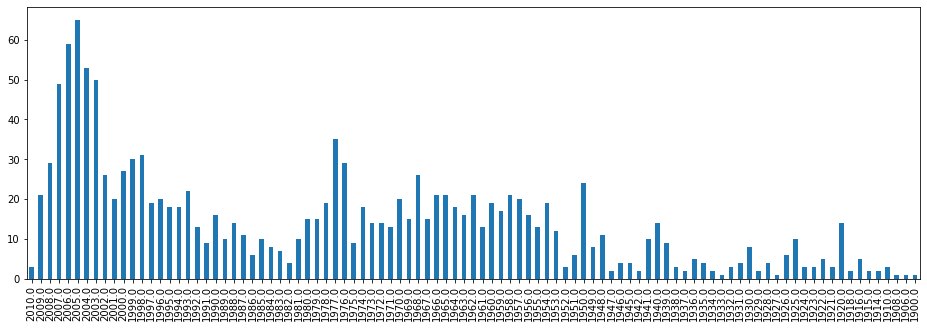

In [43]:
plt.figure(figsize= [16,5])
data['GarageYrBlt'].value_counts().sort_index(ascending=False).plot.bar()
plt.show()

In [44]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(1990.0)

In [45]:
data.isnull().sum().sum()

0

In [46]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Fence,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Fence,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Fence,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Fence,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Fence,0,12,2008,WD,Normal,250000


In [47]:
# data.select_dtypes(include=['int64', 'float64']).head()

### univariate analysis

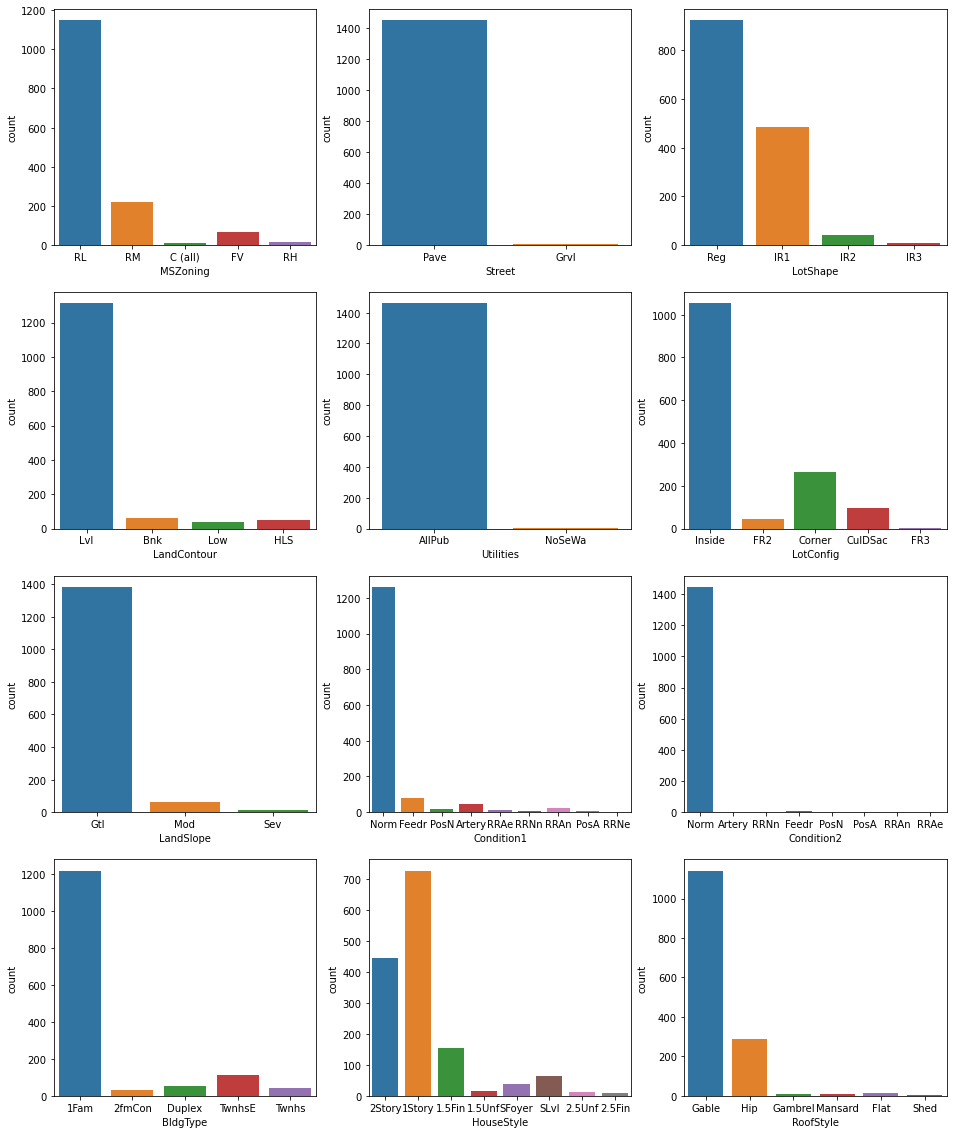

In [48]:
plt.figure(figsize=[16,20])
plt.subplot(4,3,1)
sns.countplot(data['MSZoning'])
plt.subplot(4,3,2)
sns.countplot(data['Street'])
plt.subplot(4,3,3)
sns.countplot(data['LotShape'])
plt.subplot(4,3,4)
sns.countplot(data['LandContour'])
plt.subplot(4,3,5)
sns.countplot(data['Utilities'])
plt.subplot(4,3,6)
sns.countplot(data['LotConfig'])
plt.subplot(4,3,7)
sns.countplot(data['LandSlope'])
plt.subplot(4,3,8)
sns.countplot(data['Condition1'])
plt.subplot(4,3,9)
sns.countplot(data['Condition2'])
plt.subplot(4,3,10)
sns.countplot(data['BldgType'])
plt.subplot(4,3,11)
sns.countplot(data['HouseStyle'])
plt.subplot(4,3,12)
sns.countplot(data['RoofStyle'])
plt.show()

<!-- need to drop all the columns which are highed marginalised -->

#### dropping all the columns which are highly marginalised

In [49]:
data=  data.drop(['Street','LandContour', 'Utilities','LandSlope', 'Condition1', 'Condition2'],axis=1)

In [50]:
data.shape

(1460, 72)

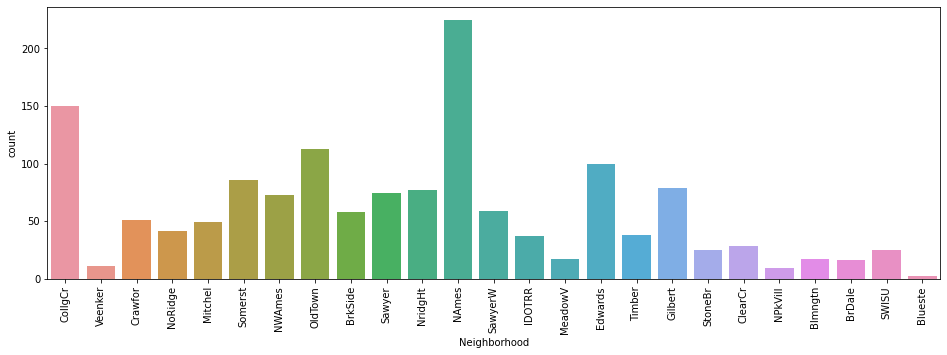

In [51]:
plt.figure(figsize=[16,5])
sns.countplot(data['Neighborhood'])
plt.xticks(rotation=90)
plt.show()

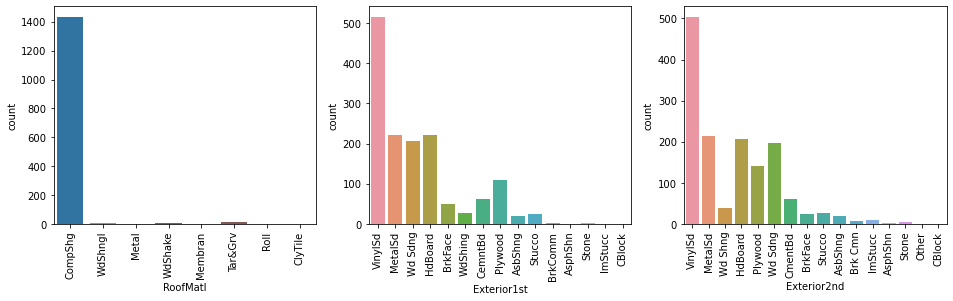

In [52]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.countplot(data['RoofMatl'])
plt.xticks(rotation=90)
plt.subplot(1,3,2)
sns.countplot(data['Exterior1st'])
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(data['Exterior2nd'])
plt.xticks(rotation=90)
plt.show()

#### dropping all the columns which are highly marginalised

In [53]:
data=  data.drop(['RoofMatl'],axis=1)

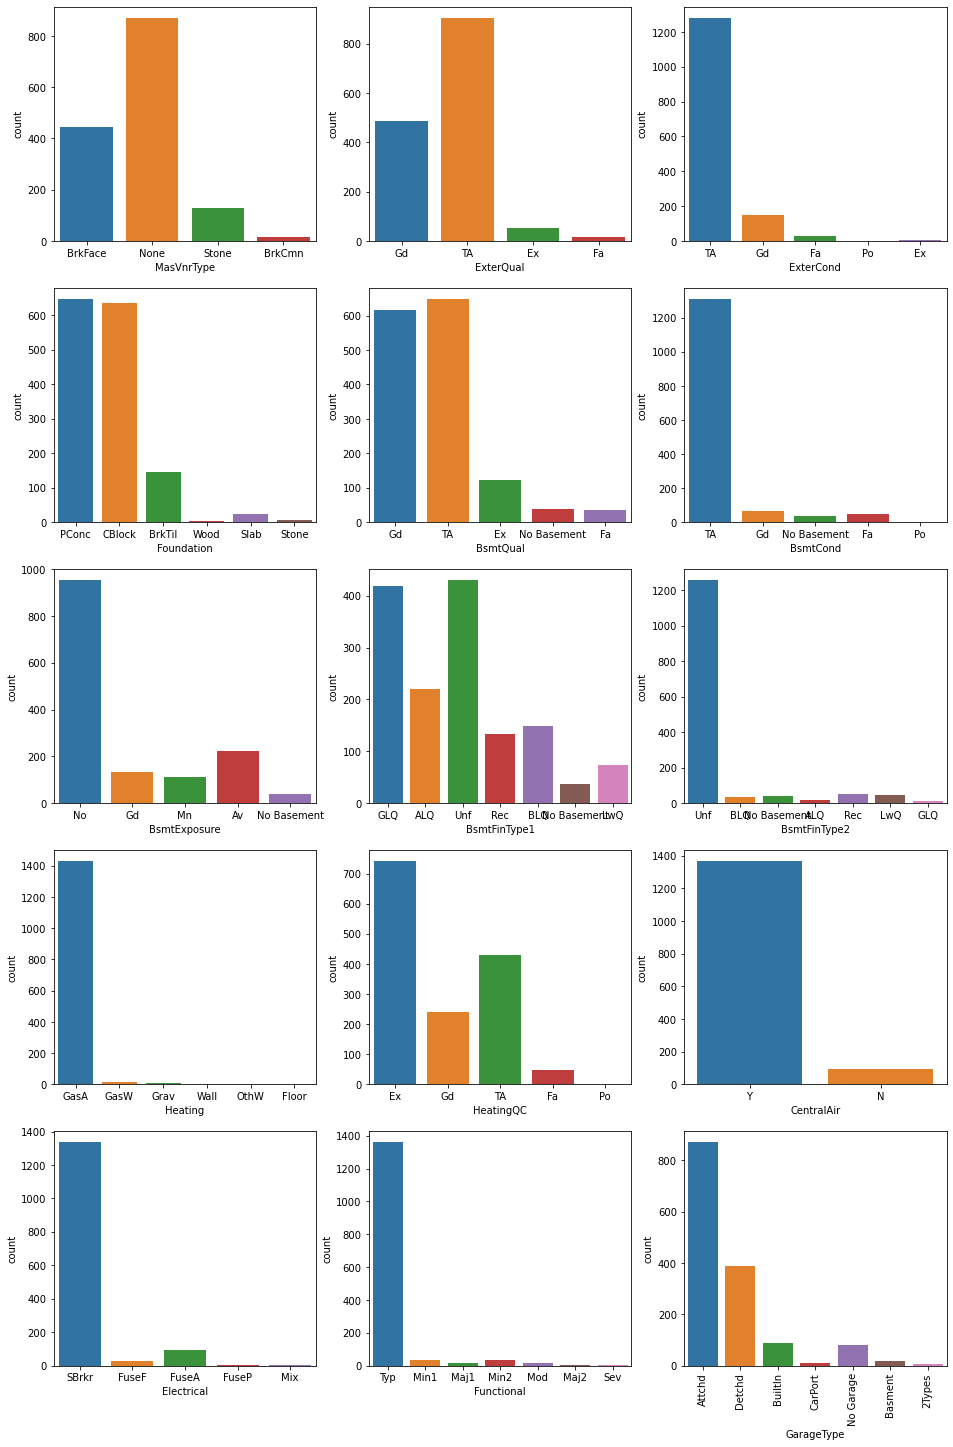

In [54]:
plt.figure(figsize=[16,25])
plt.subplot(5,3,1)
sns.countplot(data['MasVnrType'])
plt.subplot(5,3,2)
sns.countplot(data['ExterQual'])
plt.subplot(5,3,3)
sns.countplot(data['ExterCond'])
plt.subplot(5,3,4)
sns.countplot(data['Foundation'])
plt.subplot(5,3,5)
sns.countplot(data['BsmtQual'])
plt.subplot(5,3,6)
sns.countplot(data['BsmtCond'])
plt.subplot(5,3,7)
sns.countplot(data['BsmtExposure'])
plt.subplot(5,3,8)
sns.countplot(data['BsmtFinType1'])
# plt.xticks(rotation=90)
plt.subplot(5,3,9)
sns.countplot(data['BsmtFinType2'])
# plt.xticks(rotation=90)
plt.subplot(5,3,10)
sns.countplot(data['Heating'])
plt.subplot(5,3,11)
sns.countplot(data['HeatingQC'])
plt.subplot(5,3,12)
sns.countplot(data['CentralAir'])
plt.subplot(5,3,13)
sns.countplot(data['Electrical'])
plt.subplot(5,3,14)
sns.countplot(data['Functional'])
plt.subplot(5,3,15)
sns.countplot(data['GarageType'])
plt.xticks(rotation=90)
plt.show()

#### dropping all the columns which are highly marginalised

In [55]:
data=  data.drop(['Id','BsmtCond','BsmtFinType2','Heating', 'Electrical', 'Functional'],axis=1)

In [56]:
data=  data.drop(['ExterCond',],axis=1)

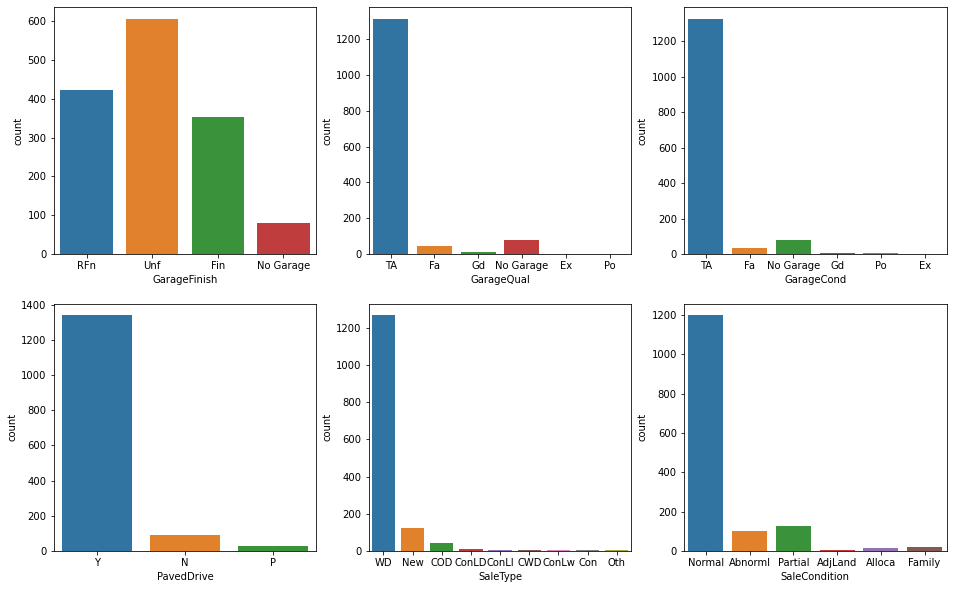

In [57]:
plt.figure(figsize=[16,10])
plt.subplot(2, 3, 1)
sns.countplot(data['GarageFinish'])
plt.subplot(2, 3, 2)
sns.countplot(data['GarageQual'])
plt.subplot(2, 3, 3)
sns.countplot(data['GarageCond'])
plt.subplot(2, 3, 4)
sns.countplot(data['PavedDrive'])
plt.subplot(2, 3, 5)
sns.countplot(data['SaleType'])
plt.subplot(2, 3, 6)
sns.countplot(data['SaleCondition'])
plt.show()

#### dropping all the columns which are highly marginalised

In [58]:
data=  data.drop(['GarageQual','GarageCond', 'PavedDrive','SaleType'],axis=1)

In [59]:
data.shape

(1460, 60)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   BldgType       1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

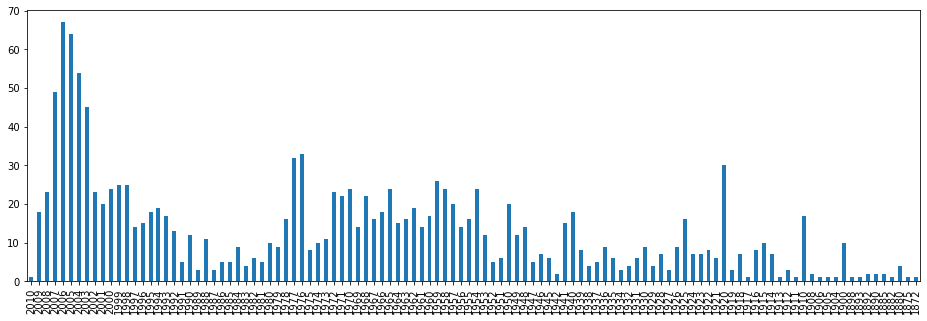

In [61]:
plt.figure(figsize= [16,5])
data['YearBuilt'].value_counts().sort_index(ascending=False).plot.bar()
plt.show()

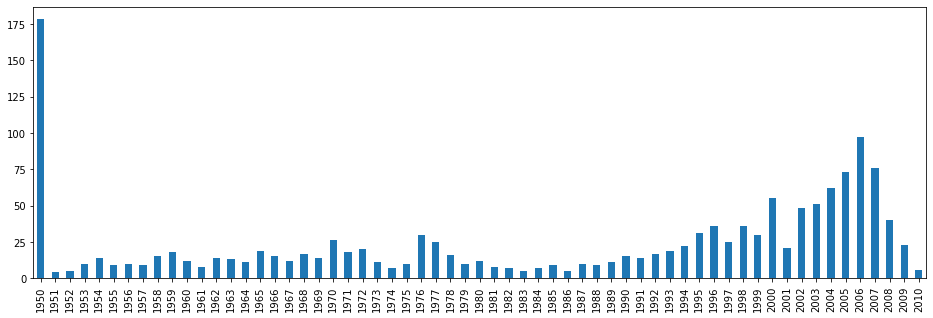

In [62]:
plt.figure(figsize= [16,5])
data['YearRemodAdd'].value_counts().sort_index(ascending=True).plot.bar()
plt.show()

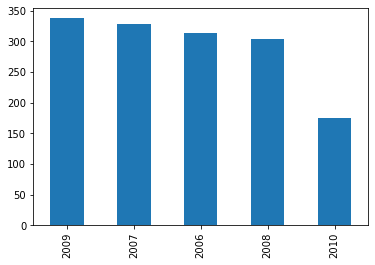

In [63]:
data['YrSold'].value_counts().plot.bar()
plt.show()

In [64]:
data['Year_after_Remodel'] = 2022 - data['YearRemodAdd']
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,Year_after_Remodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,2008,Normal,208500,19
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,2007,Normal,181500,46
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,2008,Normal,223500,20
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,2006,Abnorml,140000,52
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,2008,Normal,250000,22


In [65]:
data.shape

(1460, 61)

In [66]:
data=data.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1)

In [67]:
data.shape

(1460, 58)

### bivariate/multivariate analysis

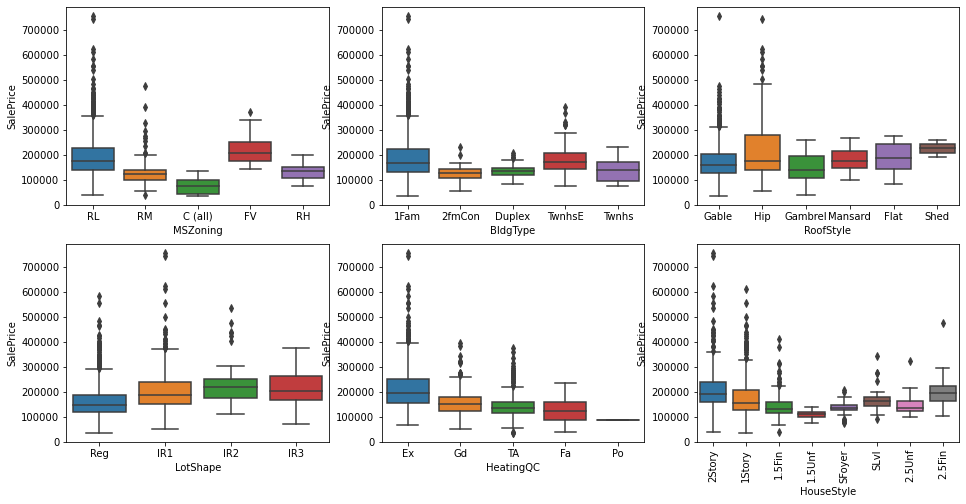

In [68]:
plt.figure(figsize=[16,8])
plt.subplot(2,3,1)
sns.boxplot(data=data, x='MSZoning', y='SalePrice')
plt.subplot(2,3,2)
sns.boxplot(data=data, x='BldgType', y='SalePrice')
plt.subplot(2,3,3)
sns.boxplot(data=data, x='RoofStyle', y='SalePrice')
plt.subplot(2,3,4)
sns.boxplot(data=data, x='LotShape', y='SalePrice')
plt.subplot(2,3,5)
sns.boxplot(data=data, x='HeatingQC', y='SalePrice')
plt.subplot(2,3,6)
sns.boxplot(data=data, x='HouseStyle', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

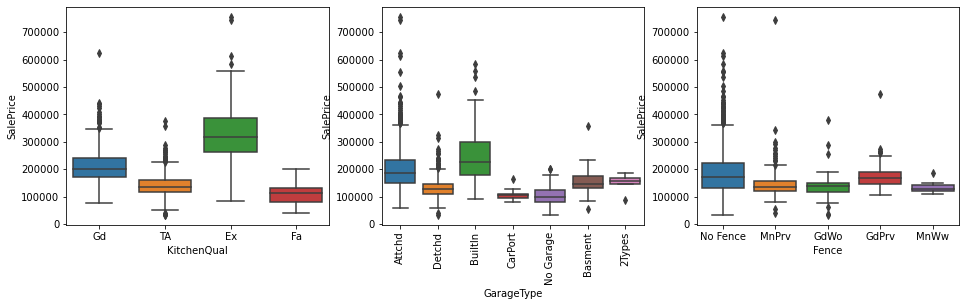

In [69]:
plt.figure(figsize=[16,4])
plt.subplot(1,3,1)
sns.boxplot(data=data, x='KitchenQual', y='SalePrice')
plt.subplot(1,3,2)
sns.boxplot(data=data, x='GarageType', y='SalePrice')
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.boxplot(data=data, x='Fence', y='SalePrice')
plt.show()

In [70]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_after_Remodel
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,68.267123,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1979.143836,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,37.134247
std,42.300571,22.356355,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.138505,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,20.645407
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,12.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,18.000000
50%,50.000000,63.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.500000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,28.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,55.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,72.000000


In [71]:
data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_after_Remodel
MSSubClass,1.000000,-0.349116,-0.139781,0.032628,-0.059316,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.089016,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.084284,-0.040581
LotFrontage,-0.349116,1.000000,0.281283,0.236891,-0.056461,0.174146,0.199171,0.034498,0.138852,0.359606,0.404099,0.070626,0.042211,0.359866,0.079531,-0.011613,0.179058,0.037839,0.232143,0.002760,0.319389,0.208721,0.054183,0.264353,0.317925,0.061329,0.131468,0.014349,0.057826,0.036907,0.177999,-0.012274,0.012785,0.329220,-0.087325
LotArea,-0.139781,0.281283,1.000000,0.105806,-0.005636,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.032734,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.013788
OverallQual,0.032628,0.236891,0.105806,1.000000,-0.091932,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.486365,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.550684
OverallCond,-0.059316,-0.056461,-0.005636,-0.091932,1.000000,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.305400,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,-0.073741
MasVnrArea,0.023573,0.174146,0.103321,0.407252,-0.125694,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.231642,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.176529
BsmtFinSF1,-0.069836,0.199171,0.214103,0.239666,-0.046231,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.137661,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.386420,-0.128451
BsmtFinSF2,-0.065649,0.034498,0.111170,-0.059119,0.040229,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.090939,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,-0.011378,0.067759
BsmtUnfSF,-0.140759,0.138852,-0.002618,0.308159,-0.136841,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.181399,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,0.214479,-0.181133
TotalBsmtSF,-0.238518,0.359606,0.260833,0.537808,-0.171098,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.292385,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,0.613581,-0.291066


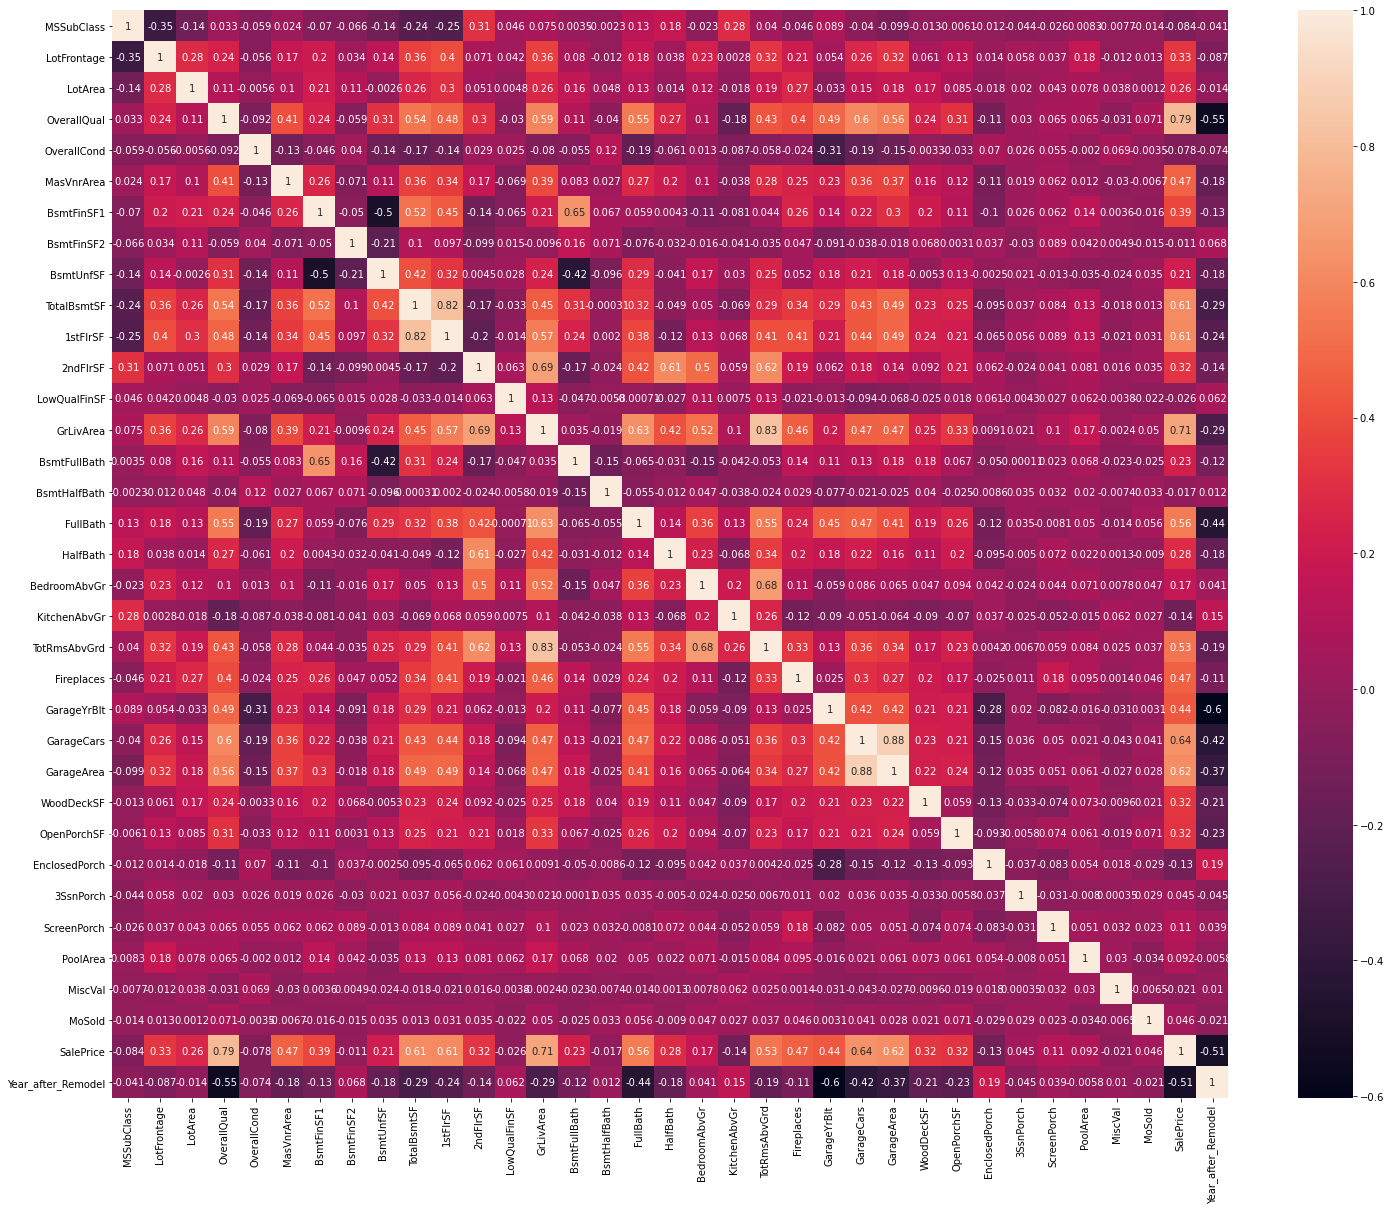

In [72]:
plt.figure(figsize=[25,20])
sns.heatmap(data.corr(), annot=True)
plt.show()

In [73]:
cols = data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea',
       'Fireplaces', 'GarageYrBlt', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF'],
      dtype='object')

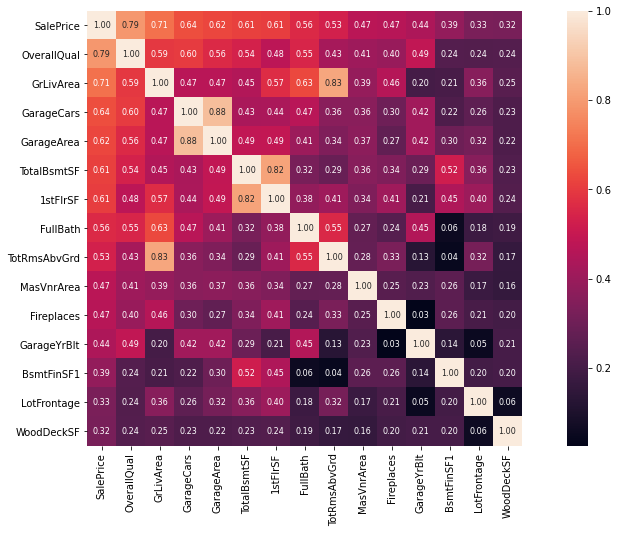

In [74]:
plt.figure(figsize=[16,8])
cols = data.corr().nlargest(15, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
# sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True,  square=True, fmt='.2f', annot_kws={'size': 8}, xticklabels=cols.values,
                 yticklabels=cols.values)
plt.show()

### model building

#### number to categorical data

In [75]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,Year_after_Remodel
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,Normal,208500,19
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,Normal,181500,46
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,Normal,223500,20
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,Abnorml,140000,52
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,Normal,250000,22


In [76]:
data['MSSubClass'] = data['MSSubClass'].replace({20: '1-STORY 1946 & NEWER ALL STYLES',
30: '1-STORY 1945 & OLDER',
40: '1-STORY W/FINISHED ATTIC ALL AGES',
45: '1-1/2 STORY - UNFINISHED ALL AGES',
50: '1-1/2 STORY FINISHED ALL AGES',
60: '2-STORY 1946 & NEWER',
70: '2-STORY 1945 & OLDER',
75: '2-1/2 STORY ALL AGES',
80: 'SPLIT OR MULTI-LEVEL',
85: 'SPLIT FOYER',
90: 'DUPLEX - ALL STYLES AND AGES',
120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
150: '1-1/2 STORY PUD - ALL AGES',
160: '2-STORY PUD - 1946 & NEWER',
180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [77]:
data['OverallQual'] = data['OverallQual'].replace({
10: 'Very Excellent',
9: 'Excellent',
8: 'Very Good',
7: 'Good',
6: 'Above Average',
5: 'Average',
4: 'Below Average',
3: 'Fair',
2: 'Poor',
1: 'Very Poor'})

In [78]:
data['OverallCond'] = data['OverallCond'].replace({
10: 'Very Excellent',
9: 'Excellent',
8: 'Very Good',
7: 'Good',
6: 'Above Average',
5: 'Average',
4: 'Below Average',
3: 'Fair',
2: 'Poor',
1: 'Very Poor'})

In [79]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,Year_after_Remodel
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,No Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,No Fence,0,2,Normal,208500,19
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,No Fence,0,5,Normal,181500,46
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,No Fence,0,9,Normal,223500,20
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,No Fence,0,2,Abnorml,140000,52
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,No Fence,0,12,Normal,250000,22


In [80]:
data.shape

(1460, 58)

#### Dummy variable creation

In [81]:
cat_cols = data.select_dtypes(include=['object'])
cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition'],
      dtype='object')

In [82]:
cat_cols.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,2-STORY 1946 & NEWER,RL,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,Gd,No Fireplace,Attchd,RFn,No Fence,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,Y,TA,TA,Attchd,RFn,No Fence,Normal
2,2-STORY 1946 & NEWER,RL,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Y,Gd,TA,Attchd,RFn,No Fence,Normal
3,2-STORY 1945 & OLDER,RL,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Y,Gd,Gd,Detchd,Unf,No Fence,Abnorml
4,2-STORY 1946 & NEWER,RL,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Y,Gd,TA,Attchd,RFn,No Fence,Normal


In [83]:
cat_cols.shape

(1460, 26)

In [84]:
cat_cols = pd.get_dummies(cat_cols, drop_first=True)
cat_cols.shape

(1460, 167)

In [85]:
cat_cols.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0

In [86]:
data=pd.concat([data, cat_cols], axis=1)
data.shape

(1460, 225)

In [87]:
data = data.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence',
       'SaleCondition'], axis=1)

In [88]:
data.shape

(1460, 199)

#### checking the dependent variable

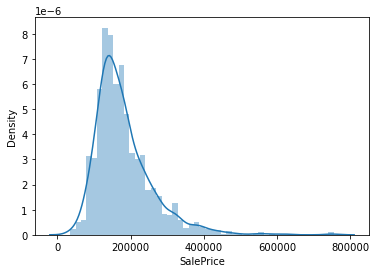

In [89]:
sns.distplot(data['SalePrice'])
plt.show()

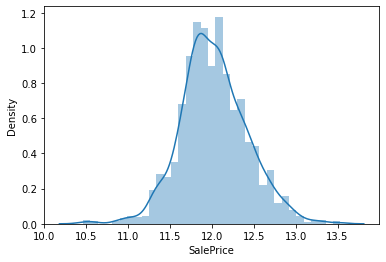

In [90]:
sns.distplot(np.log(data['SalePrice']))
plt.show()

In [91]:
data['SalePrice'] = np.log(data['SalePrice'])

In [92]:
data['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [93]:
data.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Year_after_Remodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,12.247694,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

#### train-test splitting

In [94]:
df_train, df_test = train_test_split(data, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 199)
(439, 199)


In [95]:
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice', 'Year_after_Remodel']
print(num_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Year_after_Remodel']


#### scaling

In [96]:
Scaler = StandardScaler()

df_train[num_cols] =Scaler.fit_transform(df_train[num_cols])

In [97]:
df_test[num_cols] =Scaler.transform(df_test[num_cols])

In [98]:
X_train = df_train.drop(['SalePrice'], axis=1)
y_train = df_train['SalePrice']

X_test = df_test.drop(['SalePrice'], axis=1)
y_test = df_test['SalePrice']

In [99]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Year_after_Remodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
318,0.982594,-0.057261,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,0.564339,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.833178,-0.389207,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [100]:
y_train.head()

318     1.123211
239    -0.978867
986    -0.891115
1416   -0.775233
390    -0.848358
Name: SalePrice, dtype: float64

In [101]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Year_after_Remodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.357844,-0.144614,-0.558025,0.361022,-0.293313,-0.703973,-0.431488,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.937484,-0.927153,-0.224849,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-0.469175,0.679020,0,0,1,0,0,0

In [102]:
y_test.head()

1436   -0.816759
57      0.416831
780     0.138893
382     0.626143
1170    0.066190
Name: SalePrice, dtype: float64

#### model building

In [103]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [104]:
print(lm.coef_)
print(lm.intercept_)

[-3.36612862e-02  4.54777801e-02 -1.21106214e-02  1.25017580e+11
  4.59218280e+10  1.20615918e+11 -1.23400254e+11 -3.99928083e+11
 -4.37722117e+11 -4.84540040e+10  5.34564870e+11  6.09207153e-02
  1.21383667e-02  7.80181885e-02  5.01708984e-02  9.76562500e-03
 -6.84452057e-02  4.03022766e-02 -1.63497925e-02  1.11083984e-02
  1.01989746e-01  7.66754150e-03  2.97622681e-02 -7.04956055e-03
  1.81121826e-02  1.66015625e-02  2.67791748e-02 -2.23999023e-02
 -3.57055664e-03  7.94982910e-03 -5.35583496e-02  5.06683350e-01
  3.35845947e-02  4.18022156e-01  2.83832550e-01  9.89294052e-02
  1.48492117e+10  4.04325485e-01  4.29244995e-01  3.55398178e-01
  2.27153778e-01 -7.21003506e+10  2.69298553e-01  5.54005623e-01
  4.02122498e-01  1.00431824e+00  1.03155708e+00  9.57946777e-01
  8.66851807e-01  6.55975342e-02 -1.35330200e-01  4.44869995e-02
  8.23669434e-02 -1.58569336e-01 -1.87429905e-01 -1.04904175e-02
  1.28259659e-02  4.53128815e-02  2.60215759e-01  3.66744995e-01
  2.30743408e-01  5.07171

In [105]:
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

In [106]:
metric = []

r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss_train = np.sum(np.square(y_train - y_train_pred))
print(rss_train)
metric.append(rss_train)

rss_test = np.sum(np.square(y_test - y_test_pred))
print(rss_test)
metric.append(rss_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

0.9266838647501829
-4.81829536095926e+17
74.8557740900632
2.2184787300848887e+20
0.27076952422644807
710878491.7886276


In [107]:
# predict train
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
# predict test
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9266838647501829
-4.81829536095926e+17


#### Residual analysis

In [108]:
y_res = y_train - y_train_pred

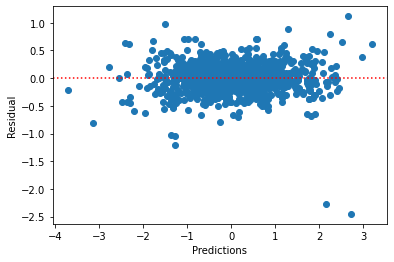

In [109]:
df_train['res'] = y_res
plt.scatter(y_train_pred, df_train['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel('Predictions')
plt.ylabel('Residual')
plt.show()

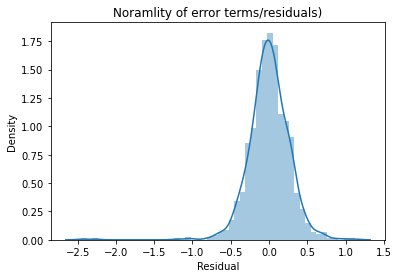

In [110]:
p = sns.distplot(y_res, kde=True)

p = plt.title('Noramlity of error terms/residuals)')
plt.xlabel('Residual')
plt.show()

In [111]:
# y_test_res = y_test - y_test_pred

In [112]:
# df_test['test_res'] = y_test_res
# plt.scatter(y_test_pred, df_test['test_res'])
# plt.axhline(y=0, color='r', linestyle=':')
# plt.xlabel('Predictions_test')
# plt.ylabel('Residual_test')
# plt.show()

In [113]:
# p = sns.distplot(y_test_res, kde=True)

# p = plt.title('Noramlity of error terms in test/test_residuals)')
# plt.xlabel('Predictions_test')
# plt.show()

#### Ridge Regression

In [114]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# cross validation
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator= ridge,
                       param_grid = params,
                       scoring = 'neg_mean_absolute_error',
                       cv =folds,
                       return_train_score = True,
                       verbose=1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [115]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 9.0}


In [116]:
#Fitting Ridge model for alpha = 9 and printing coefficients which have been penalised
alpha = 9.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.02533172  0.03898113  0.00376758  0.01035197  0.00796244  0.02566259
  0.03853432  0.06593537  0.12048804 -0.00929372  0.14714653  0.06032813
  0.00904023  0.08200117  0.04940392  0.01566753 -0.07087599  0.04055991
  0.01499252  0.00693924  0.10605335  0.00586935  0.03075489 -0.00437476
  0.01518737  0.01378659  0.0264142  -0.03144521 -0.00291249  0.00536315
 -0.07440095  0.02316856 -0.2229276   0.1098562  -0.00534873 -0.01325975
  0.00322202  0.08581083  0.07353625 -0.02681534 -0.11946641  0.07310339
 -0.06737952  0.07094595  0.0239266   0.17745224  0.13418272  0.15755992
  0.04589318  0.0555739  -0.12156833  0.02188405  0.09135925 -0.09736969
 -0.0425481  -0.01539154 -0.00831728 -0.03741332  0.06123614  0.11365519
  0.00234682  0.24317668 -0.2291962  -0.02350681 -0.1884527  -0.15782721
 -0.0434332  -0.04079577 -0.02093426 -0.04136022  0.18287718  0.25383533
 -0.13627607 -0.02100787 -0.11288826 -0.00086439  0.20490534  0.15835414
 -0.02773183  0.08231225  0.00322202  0.07310339 -0

In [117]:
print("Ridge Train Score: ")
print(ridge.score(X_train,y_train))
print("lasso Test Score:")
print(ridge.score(X_test,y_test))

Ridge Train Score: 
0.9144594782095188
lasso Test Score:
0.8748121052088336


In [118]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric2 = []

r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss_train = np.sum(np.square(y_train - y_train_pred))
print(rss_train)
metric2.append(rss_train)

rss_test = np.sum(np.square(y_test - y_test_pred))
print(rss_test)
metric2.append(rss_test)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

0.9144594782095188
0.8748121052088336
87.33687274808138
57.64002848572066
0.2924731129360121
0.3623513079246669


#### lasso regreesion

In [119]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [120]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [121]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)


Lasso(alpha=0.001)

In [122]:
lasso.coef_

array([-2.26259953e-02,  3.57557226e-02, -0.00000000e+00, -0.00000000e+00,
        7.87559415e-04,  1.62826280e-02,  3.85729996e-02,  0.00000000e+00,
        3.19235827e-02, -1.89121603e-02,  2.40138510e-01,  6.33093050e-02,
        7.77101591e-03,  7.78767389e-02,  4.49426481e-02,  1.38225695e-02,
       -6.68071785e-02,  3.69260048e-02,  6.18823001e-03, -0.00000000e+00,
        1.11446165e-01,  0.00000000e+00,  2.96080182e-02, -3.55974065e-03,
        1.57250396e-02,  1.33569472e-02,  2.61336514e-02, -2.92272003e-02,
       -0.00000000e+00,  2.72791642e-03, -7.68862715e-02, -0.00000000e+00,
       -2.87322211e-01,  8.63933964e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.02874779e-02,  0.00000000e+00, -1.26227809e-02,
       -1.16395628e-01,  8.15795492e-02, -0.00000000e+00,  4.98834367e-03,
        5.90942830e-04,  1.58850746e-01,  1.45547359e-01,  1.45853623e-01,
        3.93280413e-02,  4.36113295e-02, -7.51715247e-02,  1.84550852e-02,
        8.40930935e-02, -

In [123]:
print("lasso Train Score: ")
print(lasso.score(X_train,y_train))
print("lasso Test Score:")
print(lasso.score(X_test,y_test))

lasso Train Score: 
0.9161702953478661
lasso Test Score:
0.875895540798165


In [124]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9161702953478661
0.875895540798165
85.59012844982877
57.14118426171899
0.08382970465213395
0.13016215093785646


In [125]:
# Creating a table which contain all the metrics

LR_table = {'Metrics':['R2_Score(Train)', 'R2_Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'],
           'Linear Regression': metric}

LR_metric = pd.DataFrame(LR_table, columns=['Metrics', 'Linear Regression'])
Ridge_metric = pd.Series(metric2, name='Ridge Regression')
Lasso_metric = pd.Series(metric3, name='Lasso Regression')

final_metric = pd.concat([LR_metric, Ridge_metric, Lasso_metric], axis=1)

final_metric

,Metrics,Linear Regression,Ridge Regression,Lasso Regression
0,R2_Score(Train),9.266839e-01,0.914459,0.916170
1,R2_Score (Test),-4.818295e+17,0.874812,0.875896
2,RSS (Train),7.485577e+01,87.336873,85.590128
3,RSS (Test),2.218479e+20,57.640028,57.141184
4,MSE (Train),2.707695e-01,0.292473,0.289534
5,MSE (Test),7.108785e+08,0.362351,0.360780


#### comparison of coefficients( $\beta $ ) after regularization

In [126]:
betas =pd.DataFrame(index=X_train.columns)
betas.shape

(198, 0)

In [127]:
betas.rows = X_train.columns

In [128]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [129]:
pd.set_option('display.max_rows', None)

In [130]:
betas

,Linear,Ridge,Lasso
LotFrontage,-3.366129e-02,-0.025332,-2.262600e-02
LotArea,4.547778e-02,0.038981,3.575572e-02
MasVnrArea,-1.211062e-02,0.003768,-0.000000e+00
BsmtFinSF1,1.250176e+11,0.010352,-0.000000e+00
BsmtFinSF2,4.592183e+10,0.007962,7.875594e-04
BsmtUnfSF,1.206159e+11,0.025663,1.628263e-02
TotalBsmtSF,-1.234003e+11,0.038534,3.857300e-02
1stFlrSF,-3.999281e+11,0.065935,0.000000e+00
2ndFlrSF,-4.377221e+11,0.120488,3.192358e-02
LowQualFinSF,-4.845400e+10,-0.009294,-1.891216e-02


In [131]:
betas.describe()

,Linear,Ridge,Lasso
count,1.980000e+02,198.000000,198.000000
mean,-9.261827e+08,0.001686,-0.000354
std,5.955767e+10,0.091881,0.114533
min,-4.377221e+11,-0.342865,-0.630906
25%,-7.241321e-02,-0.042251,-0.013116
50%,4.543801e-02,0.003649,-0.000000
75%,2.366664e-01,0.043108,0.016143
max,5.345649e+11,0.370237,0.564182


## conclusion:

- R2 score using Ridge and Lasso
1. Ridge- Train:0.914459, Test:0.874812
2. Lasso- Train:0.916170, Test:0.875896


- Ridge Model top5 predictor variable
1. OverallQual_Excellent    0.370237
2. OverallQual_Very Good    0.265409
3. Neighborhood_NridgHt     0.253835
4. Neighborhood_Crawfor     0.243177
5. Neighborhood_Somerst     0.204905


- Lasso Model top5 predictor variable
1. OverallQual_Excellent    0.564182
2. OverallQual_Very Good    0.328329
3. Neighborhood_Crawfor     0.304465
4. Neighborhood_NridgHt     0.292958
5. Neighborhood_Somerst     0.248177


#### doubling the alpha value for Ridge and lasso.

In [132]:
double_alpha = 18.0         #(alpha = 9.0*2)
ridge_double = Ridge(alpha=double_alpha)

ridge_double.fit(X_train, y_train)
print(ridge_double.coef_)

[-2.27859105e-02  3.78133742e-02  9.61918317e-03  1.70869916e-02
  8.85909331e-03  2.75885507e-02  4.75737954e-02  6.75242626e-02
  1.14063527e-01 -1.11381357e-02  1.42907427e-01  6.07716873e-02
  1.00596437e-02  8.30943449e-02  5.00026971e-02  1.50627402e-02
 -7.12516884e-02  4.71926737e-02  2.84138798e-02  8.36053464e-03
  1.06137436e-01  1.50396770e-02  3.15621346e-02 -4.10528002e-03
  1.35882976e-02  1.34686071e-02  2.66591753e-02 -3.50696641e-02
 -3.47853719e-03  5.97646206e-03 -8.39486898e-02  1.31272561e-02
 -1.92874563e-01  1.08819324e-01  2.85511395e-03  7.45484096e-05
 -6.39365920e-03  5.91538773e-02  7.29948032e-02 -2.71753053e-02
 -1.02115795e-01  5.47830171e-02 -4.80165426e-02  4.08417404e-02
  1.60004202e-02  1.29000325e-01  7.29689967e-02  1.15328133e-01
 -1.33059843e-02  4.44355624e-02 -9.92780689e-02  1.35914101e-02
  8.60616148e-02 -7.18967212e-02 -2.26103466e-02 -1.32706979e-02
 -4.01736347e-03 -2.62969821e-02  6.26041793e-02  8.37126944e-02
 -9.97710466e-03  2.00981

In [133]:
y_train_pred = ridge_double.predict(X_train)
y_test_pred = ridge_double.predict(X_test)

metric4=[]

r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric4.append(r2_test_lr)

# rss1_lr = np.sum(np.square(y_train - y_train_pred))
# print(rss1_lr)
# metric4.append(rss1_lr)

# rss2_lr = np.sum(np.square(y_test - y_test_pred))
# print(rss2_lr)
# metric4.append(rss2_lr)

# mse_train_lr = mean_squared_error(y_train, y_train_pred)
# print(mse_train_lr)
# metric4.append(mse_train_lr**0.5)

# mse_test_lr = mean_squared_error(y_test, y_test_pred)
# print(mse_test_lr)
# metric4.append(mse_test_lr**0.5)

0.9071761156189729
0.8694798101533512


In [134]:
double_alpha = 0.002              #(alpha = 0.001*2)
lasso_double = Lasso(alpha=double_alpha)

lasso_double.fit(X_train, y_train)
lasso_double.coef_

array([-0.01768987,  0.03238038,  0.00325229,  0.        , -0.        ,
        0.0112492 ,  0.0695414 ,  0.        ,  0.01995697, -0.02091119,
        0.24916751,  0.06605563,  0.00943608,  0.07775565,  0.04557181,
        0.01145598, -0.06350084,  0.04016182,  0.01953104,  0.        ,
        0.11932137,  0.        ,  0.03067873, -0.00095776,  0.01279533,
        0.01162726,  0.02660539, -0.03469574, -0.        ,  0.00315461,
       -0.09047281, -0.        , -0.25999126,  0.09541441, -0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.11693139,  0.        , -0.        ,  0.        ,  0.        ,
        0.07823391,  0.00476518,  0.09521646, -0.        ,  0.00380477,
       -0.02506187,  0.00150097,  0.09070675, -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.08832074,
        0.        ,  0.27291427, -0.22104469, -0.        , -0.20089191,
       -0.19593756, -0.        , -0.01623795, -0.        , -0.  

In [135]:
y_train_pred = lasso_double.predict(X_train)
y_test_pred = lasso_double.predict(X_test)

metric5=[]

r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric5.append(r2_test_lr)

# rss1_lr = np.sum(np.square(y_train - y_train_pred))
# print(rss1_lr)
# metric5.append(rss1_lr)

# rss2_lr = np.sum(np.square(y_test - y_test_pred))
# print(rss2_lr)
# metric5.append(rss2_lr)

# mse_train_lr = mean_squared_error(y_train, y_train_pred)
# print(mse_train_lr)
# metric5.append(mse_train_lr**0.5)

# mse_test_lr = mean_squared_error(y_test, y_test_pred)
# print(mse_test_lr)
# metric5.append(mse_test_lr**0.5)

0.9058542587137497
0.8710513692520405


In [136]:
LR_table = {'Metrics':['R2_Score(Train)', 'R2_Score (Test)']}

# LR_metric = pd.DataFrame(LR_table, columns=['Metrics', 'Linear Regression'])
Ridge_metric = pd.Series(metric4, name='Ridge Regression')
Lasso_metric = pd.Series(metric5, name='Lasso Regression')

final_metric = pd.concat([Ridge_metric, Lasso_metric], axis=1)

final_metric

,Ridge Regression,Lasso Regression
0,0.907176,0.905854
1,0.869480,0.871051


In [137]:
betas['ridge_double'] = ridge_double.coef_
betas['lasso_double'] = lasso_double.coef_

In [138]:
betas

,Linear,Ridge,Lasso,ridge_double,lasso_double
LotFrontage,-3.366129e-02,-0.025332,-2.262600e-02,-0.022786,-0.017690
LotArea,4.547778e-02,0.038981,3.575572e-02,0.037813,0.032380
MasVnrArea,-1.211062e-02,0.003768,-0.000000e+00,0.009619,0.003252
BsmtFinSF1,1.250176e+11,0.010352,-0.000000e+00,0.017087,0.000000
BsmtFinSF2,4.592183e+10,0.007962,7.875594e-04,0.008859,-0.000000
BsmtUnfSF,1.206159e+11,0.025663,1.628263e-02,0.027589,0.011249
TotalBsmtSF,-1.234003e+11,0.038534,3.857300e-02,0.047574,0.069541
1stFlrSF,-3.999281e+11,0.065935,0.000000e+00,0.067524,0.000000
2ndFlrSF,-4.377221e+11,0.120488,3.192358e-02,0.114064,0.019957
LowQualFinSF,-4.845400e+10,-0.009294,-1.891216e-02,-0.011138,-0.020911


In [139]:
betas.describe()

,Linear,Ridge,Lasso,ridge_double,lasso_double
count,1.980000e+02,198.000000,198.000000,198.000000,198.000000
mean,-9.261827e+08,0.001686,-0.000354,0.001417,0.004330
std,5.955767e+10,0.091881,0.114533,0.074075,0.089531
min,-4.377221e+11,-0.342865,-0.630906,-0.253530,-0.526103
25%,-7.241321e-02,-0.042251,-0.013116,-0.035539,0.000000
50%,4.543801e-02,0.003649,-0.000000,0.003448,0.000000
75%,2.366664e-01,0.043108,0.016143,0.035434,0.002741
max,5.345649e+11,0.370237,0.564182,0.284483,0.537957


In [140]:
betas['Ridge'].sort_values(ascending=False).head()

OverallQual_Excellent    0.370237
OverallQual_Very Good    0.265409
Neighborhood_NridgHt     0.253835
Neighborhood_Crawfor     0.243177
Neighborhood_Somerst     0.204905
Name: Ridge, dtype: float64

In [141]:
betas['ridge_double'].sort_values(ascending=False).head()

OverallQual_Excellent    0.284483
OverallQual_Very Good    0.227210
Neighborhood_NridgHt     0.204993
Neighborhood_Crawfor     0.200981
CentralAir_Y             0.174936
Name: ridge_double, dtype: float64

In [142]:
betas['Lasso'].sort_values(ascending=False).head()

OverallQual_Excellent    0.564182
OverallQual_Very Good    0.328329
Neighborhood_Crawfor     0.304465
Neighborhood_NridgHt     0.292958
Neighborhood_Somerst     0.248177
Name: Lasso, dtype: float64

In [143]:
betas['lasso_double'].sort_values(ascending=False).head()

OverallQual_Excellent    0.537957
OverallQual_Very Good    0.316586
Neighborhood_Crawfor     0.272914
Neighborhood_NridgHt     0.249348
GrLivArea                0.249168
Name: lasso_double, dtype: float64

#### after removing top 5

In [145]:
X_train_drop5 = X_train.drop(['OverallQual_Excellent','OverallQual_Excellent','Neighborhood_Crawfor',
                                'Neighborhood_NridgHt','GrLivArea'],axis=1)

X_test_drop5 = X_test.drop(['OverallQual_Excellent','OverallQual_Excellent','Neighborhood_Crawfor',
                                'Neighborhood_NridgHt','GrLivArea'],axis=1)

In [ ]:
# lasso = Lasso()

# # cross validation
# model_cv = GridSearchCV(estimator = lasso, 
#                         param_grid = params, 
#                         scoring= 'neg_mean_absolute_error', 
#                         cv = folds, 
#                         return_train_score=True,
#                         verbose = 1)            

# model_cv.fit(X_train, y_train)

In [146]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_drop5, y_train)

Lasso(alpha=0.001)

In [148]:
y_train_pred = lasso.predict(X_train_drop5)
y_test_pred = lasso.predict(X_test_drop5)

# metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print('R2_train: ', r2_train_lr)
# metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print('R2_test: ', r2_test_lr)
# metric3.append(r2_test_lr)

R2_train:  0.9087625257497507
R2_test:  0.8665715751245788


In [147]:
lasso.coef_

array([-1.90631720e-02,  3.84043802e-02,  1.18797157e-02, -0.00000000e+00,
        0.00000000e+00,  1.66526141e-02,  4.52057542e-02,  1.71311403e-01,
        2.16079747e-01, -6.71905936e-04,  6.04407419e-02,  2.65955346e-03,
        7.40472574e-02,  3.65400140e-02,  1.06506798e-02, -7.34447655e-02,
        5.27963661e-02,  2.69516094e-02, -0.00000000e+00,  1.15607854e-01,
        5.30409803e-03,  3.37769753e-02, -5.69946139e-03,  1.58320160e-02,
        1.21927210e-02,  2.51320574e-02, -3.53855631e-02, -7.82356662e-04,
        7.59457500e-03, -8.33125946e-02, -0.00000000e+00, -3.16903232e-01,
        7.18299083e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        6.70553082e-02,  4.15246774e-02, -2.83609836e-02, -1.59339029e-01,
        8.35686155e-02, -0.00000000e+00,  4.32314560e-03,  0.00000000e+00,
        2.53818466e-01,  1.66179695e-01,  1.93850311e-01,  3.38376581e-02,
        1.24538616e-02, -1.73420897e-01,  2.95406900e-03,  7.74509005e-02,
       -6.17327239e-02, -

In [155]:
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso.coef_), columns=X_train_drop5.columns).T

In [156]:
lasso_coeff.rename(columns={0: 'lasso_coef'},inplace=True)

In [160]:
lasso_coeff['lasso_coef'].sort_values(ascending=False).head()

MSZoning_FV              0.253818
OverallQual_Very Good    0.222869
2ndFlrSF                 0.216080
Exterior1st_BrkFace      0.202498
MSZoning_RL              0.193850
Name: lasso_coef, dtype: float64